# Data Ingestion with Pandas

[DataCamp Streamlined Data Ingestion with Pandas Course](https://app.datacamp.com/learn/courses/streamlined-data-ingestion-with-pandas)

## Importing Data from Flat Files

### Introduction to Flatfiles
- Simple,easy-to-produce format
- Data stored as plaintext(no formaing)
- One row per line - Values for different fields are separated by a delimiter
- Most common flat file type:comma-separated values
- One pandas functiontoloadthemall: read_csv()


In [1]:
import matplotlib.pyplot as plt

#### Loading CSVs

In [2]:
# Import pandas as pd
import pandas as pd

# Read the CSV and assign it to the variable data
data = pd.read_csv('vt_tax_data_2016.csv')

# View the first few lines of data
print(data.head())

   STATEFIPS STATE  zipcode  agi_stub      N1  mars1  MARS2  MARS4   PREP  \
0         50    VT        0         1  111580  85090  14170  10740  45360   
1         50    VT        0         2   82760  51960  18820  11310  35600   
2         50    VT        0         3   46270  19540  22650   3620  24140   
3         50    VT        0         4   30070   5830  22190    960  16060   
4         50    VT        0         5   39530   3900  33800    590  22500   

       N2  ...  N10300  A10300  N85530  A85530  N85300  A85300  N11901  \
0  130630  ...   53660   50699       0       0       0       0   10820   
1  132950  ...   74340  221146       0       0       0       0   12820   
2   91870  ...   44860  266097       0       0       0       0   10810   
3   71610  ...   29580  264678       0       0       0       0    7320   
4  103710  ...   39170  731963      40      24       0       0   12500   

   A11901  N11902  A11902  
0    9734   88260  138337  
1   20029   68760  151729  
2   2449

#### Loading other Flat files

<Axes: xlabel='agi_stub'>

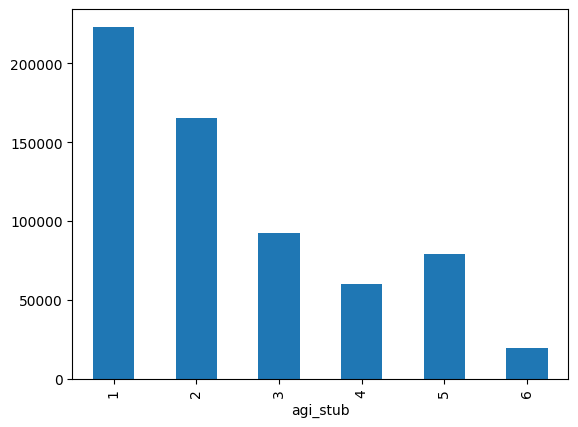

In [3]:
# Import pandas with the alias pd
import pandas as pd

# Load TSV using the sep keyword argument to set delimiter
data = pd.read_csv('vt_tax_data_2016.tsv', sep='\t')

# Plot the total number of tax returns by income group
counts = data.groupby("agi_stub").N1.sum()
counts.plot.bar()
# plt.show()

#### Modifying flat file imports

##### Limiting Columns

In [4]:
# Managing the amount of data to load

# Create list of columns to use
cols = ['zipcode','agi_stub','mars1','MARS2','NUMDEP']

# Create dataframe from csv using only selected columns
data = pd.read_csv("vt_tax_data_2016.csv", usecols=cols)

# View counts of dependents and tax returns by income level
print(data.groupby("agi_stub").sum())

          zipcode   mars1  MARS2  NUMDEP
agi_stub                                
1         1439444  170320  28480   52490
2         1439444  104000  37690   64660
3         1439444   39160  45390   47330
4         1439444   11670  44410   37760
5         1439444    7820  67750   60730
6         1439444    1210  16340   16300


##### Limiting Rows

In [5]:
# Import pandas as pd
import pandas as pd

# Read the CSV and assign it to the variable data
data = pd.read_csv('vt_tax_data_2016.csv')

# Create dataframe of first 500 rows with labeled columns
vt_data_first500 = pd.read_csv("vt_tax_data_2016.csv",
                       		  nrows=500,
                       		  skiprows=1,
                       		  header=None,
                       		  names=list(data))

# View the Vermont dataframes to confirm they're different
vt_data_first500.head()

,STATEFIPS,STATE,zipcode,agi_stub,N1,mars1,MARS2,MARS4,PREP,N2,...,N10300,A10300,N85530,A85530,N85300,A85300,N11901,A11901,N11902,A11902
0,50,VT,0,1,111580,85090,14170,10740,45360,130630,...,53660,50699,0,0,0,0,10820,9734,88260,138337
1,50,VT,0,2,82760,51960,18820,11310,35600,132950,...,74340,221146,0,0,0,0,12820,20029,68760,151729
2,50,VT,0,3,46270,19540,22650,3620,24140,91870,...,44860,266097,0,0,0,0,10810,24499,34600,90583
3,50,VT,0,4,30070,5830,22190,960,16060,71610,...,29580,264678,0,0,0,0,7320,21573,21300,67045
4,50,VT,0,5,39530,3900,33800,590,22500,103710,...,39170,731963,40,24,0,0,12500,67761,23320,103034


In [6]:
# Create dataframe of next 500 rows with labeled columns
vt_data_next500 = pd.read_csv("vt_tax_data_2016.csv",
                       		  nrows=500,
                       		  skiprows=499,
                       		  header=None,
                       		  names=list(data))

# View the Vermont dataframes to confirm they're different
print(vt_data_first500.head())
print(vt_data_next500.head())

   STATEFIPS STATE  zipcode  agi_stub      N1  mars1  MARS2  MARS4   PREP  \
0         50    VT        0         1  111580  85090  14170  10740  45360   
1         50    VT        0         2   82760  51960  18820  11310  35600   
2         50    VT        0         3   46270  19540  22650   3620  24140   
3         50    VT        0         4   30070   5830  22190    960  16060   
4         50    VT        0         5   39530   3900  33800    590  22500   

       N2  ...  N10300  A10300  N85530  A85530  N85300  A85300  N11901  \
0  130630  ...   53660   50699       0       0       0       0   10820   
1  132950  ...   74340  221146       0       0       0       0   12820   
2   91870  ...   44860  266097       0       0       0       0   10810   
3   71610  ...   29580  264678       0       0       0       0    7320   
4  103710  ...   39170  731963      40      24       0       0   12500   

   A11901  N11902  A11902  
0    9734   88260  138337  
1   20029   68760  151729  
2   2449

In [7]:
# Create dict specifying data types for agi_stub and zipcode
data_types = {"agi_stub":"category",
			  "zipcode" : "object"}

# Load csv using dtype to set correct data types
data = pd.read_csv("vt_tax_data_2016.csv", dtype=data_types)

# Print data types of resulting frame
print(data.dtypes.head())

STATEFIPS       int64
STATE          object
zipcode        object
agi_stub     category
N1              int64
dtype: object


#### Handling errors and missing data

##### Customizing Missing Data Values

In [8]:
# Create dict specifying that 0s in zipcode are NA values
null_values = {"zipcode":0}

# Load csv using na_values keyword argument
data = pd.read_csv("vt_tax_data_2016.csv",
                   na_values=null_values)

# View rows with NA ZIP codes
print(data[data.zipcode.isna()])

   STATEFIPS STATE  zipcode  agi_stub      N1  mars1  MARS2  MARS4   PREP  \
0         50    VT      NaN         1  111580  85090  14170  10740  45360   
1         50    VT      NaN         2   82760  51960  18820  11310  35600   
2         50    VT      NaN         3   46270  19540  22650   3620  24140   
3         50    VT      NaN         4   30070   5830  22190    960  16060   
4         50    VT      NaN         5   39530   3900  33800    590  22500   
5         50    VT      NaN         6    9620    600   8150      0   7040   

       N2  ...  N10300  A10300  N85530  A85530  N85300  A85300  N11901  \
0  130630  ...   53660   50699       0       0       0       0   10820   
1  132950  ...   74340  221146       0       0       0       0   12820   
2   91870  ...   44860  266097       0       0       0       0   10810   
3   71610  ...   29580  264678       0       0       0       0    7320   
4  103710  ...   39170  731963      40      24       0       0   12500   
5   26430  ...  

#### Lines with Errors

In [10]:
try:
  # Import the CSV without any keyword arguments
  data = pd.read_csv('vt_tax_data_2016_corrupt.csv')

  # View first 5 records
  print(data.head())

except pd.errors.ParserError:
    print("Your data contained rows that could not be parsed.")

Your data contained rows that could not be parsed.


In [11]:
# using error_bad_lines will skip rows with errors
try:
  # Import CSV with error_bad_lines set to skip bad records
  data = pd.read_csv("vt_tax_data_2016_corrupt.csv",
                     error_bad_lines=False)

  # View first 5 records
  print(data.head())

except pd.errors.ParserError:
    print("Your data contained rows that could not be parsed.")

   STATEFIPS STATE  zipcode  agi_stub      N1  mars1  MARS2  MARS4   PREP  \
0         50    VT        0         1  111580  85090  14170  10740  45360   
1         50    VT        0         3   46270  19540  22650   3620  24140   
2         50    VT        0         4   30070   5830  22190    960  16060   
3         50    VT        0         5   39530   3900  33800    590  22500   
4         50    VT        0         6    9620    600   8150      0   7040   

       N2  ...  N10300  A10300  N85530  A85530  N85300  A85300  N11901  \
0  130630  ...   53660   50699       0       0       0       0   10820   
1   91870  ...   44860  266097       0       0       0       0   10810   
2   71610  ...   29580  264678       0       0       0       0    7320   
3  103710  ...   39170  731963      40      24       0       0   12500   
4   26430  ...    9600  894432    3350    4939    4990   20428    3900   

   A11901  N11902  A11902  
0    9734   88260  138337  
1   24499   34600   90583  
2   2157

<ipython-input-11-26be141858e0>:4: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv("vt_tax_data_2016_corrupt.csv",
Skipping line 3: expected 147 fields, saw 148
Skipping line 10: expected 147 fields, saw 148



In [12]:
# using error_bad_lines and wran_bad_lines will skip and print out rows with errors
try:
  # Set warn_bad_lines to issue warnings about bad records
  data = pd.read_csv("vt_tax_data_2016_corrupt.csv",
                     error_bad_lines=False,
                     warn_bad_lines=True)

  # View first 5 records
  print(data.head())

except pd.errors.ParserError:
    print("Your data contained rows that could not be parsed.")

# Skipping line 3: expected 147 fields, saw 148
# Skipping line 10: expected 147 fields, saw 148

   STATEFIPS STATE  zipcode  agi_stub      N1  mars1  MARS2  MARS4   PREP  \
0         50    VT        0         1  111580  85090  14170  10740  45360   
1         50    VT        0         3   46270  19540  22650   3620  24140   
2         50    VT        0         4   30070   5830  22190    960  16060   
3         50    VT        0         5   39530   3900  33800    590  22500   
4         50    VT        0         6    9620    600   8150      0   7040   

       N2  ...  N10300  A10300  N85530  A85530  N85300  A85300  N11901  \
0  130630  ...   53660   50699       0       0       0       0   10820   
1   91870  ...   44860  266097       0       0       0       0   10810   
2   71610  ...   29580  264678       0       0       0       0    7320   
3  103710  ...   39170  731963      40      24       0       0   12500   
4   26430  ...    9600  894432    3350    4939    4990   20428    3900   

   A11901  N11902  A11902  
0    9734   88260  138337  
1   24499   34600   90583  
2   2157

<ipython-input-12-0a6c33ff61fe>:4: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv("vt_tax_data_2016_corrupt.csv",
<ipython-input-12-0a6c33ff61fe>:4: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv("vt_tax_data_2016_corrupt.csv",
Skipping line 3: expected 147 fields, saw 148
Skipping line 10: expected 147 fields, saw 148



## Importing Data From Excel Files

### Introduction to spreadsheets
- Also known as Excel files
- Data stored in tabular form, with cells arranged in rows and columns
- Unlike ftat files, can have formating and formulas
- Multiple spreadsheets can exist in a workbook



##### Loading Spreadsheets

In [13]:
# Load pandas as pd
import pandas as pd

# Read spreadsheet and assign it to survey_responses
survey_responses = pd.read_excel('fcc-new-coder-survey.xlsx')

# View the head of the dataframe
print(survey_responses.head())

   FreeCodeCamp New Developer Survey Responses, 2016        Unnamed: 1  \
0  Source: https://www.kaggle.com/freecodecamp/20...               NaN   
1                                                Age  AttendedBootcamp   
2                                                 28                 0   
3                                                 22                 0   
4                                                 19                 0   

       Unnamed: 2         Unnamed: 3    Unnamed: 4         Unnamed: 5  \
0             NaN                NaN           NaN                NaN   
1  BootcampFinish  BootcampLoanYesNo  BootcampName  BootcampRecommend   
2             NaN                NaN           NaN                NaN   
3             NaN                NaN           NaN                NaN   
4             NaN                NaN           NaN                NaN   

       Unnamed: 6                     Unnamed: 7            Unnamed: 8  \
0             NaN                         

##### Loading Selected Columns and Rows

In [14]:
# Create string of lettered columns to load
col_string = "AD, AW:BA"

# Load data with skiprows and usecols set
survey_responses = pd.read_excel("/content/fcc-new-coder-survey.xlsx",
                        usecols=col_string,
                        skiprows=2)

# View the names of the columns selected
print(survey_responses.columns)

Index(['ExpectedEarning', 'JobApplyWhen', 'JobPref', 'JobRelocateYesNo',
       'JobRoleInterest', 'JobWherePref'],
      dtype='object')


##### Getting data from multiple worksheets


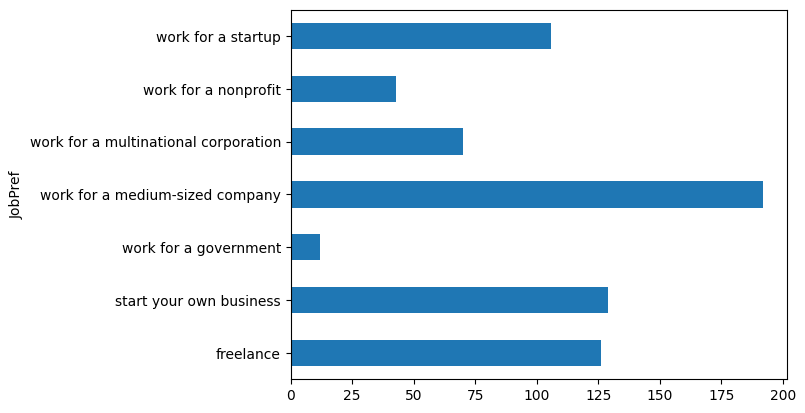

In [15]:
# Create df from second worksheet by referencing its position
responses_2017 = pd.read_excel("/content/fcc-new-coder-survey.xlsx",
                               sheet_name='2017',
                               skiprows=2)
# responses_2017.head()
# Graph where people would like to get a developer job
job_prefs = responses_2017.groupby("JobPref").JobPref.count()
job_prefs.plot.barh()
plt.show()

In [16]:
# Load both the 2016 and 2017 sheets by name
all_survey_data = pd.read_excel("/content/fcc-new-coder-survey.xlsx",
                                skiprows=2,
                                sheet_name=None)

# View the data type of all_survey_data
print(type(all_survey_data))

<class 'dict'>


Adding 1000 rows
Adding 1000 rows


<ipython-input-17-8af12a7ac4aa>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_responses = all_responses.append(df[1])


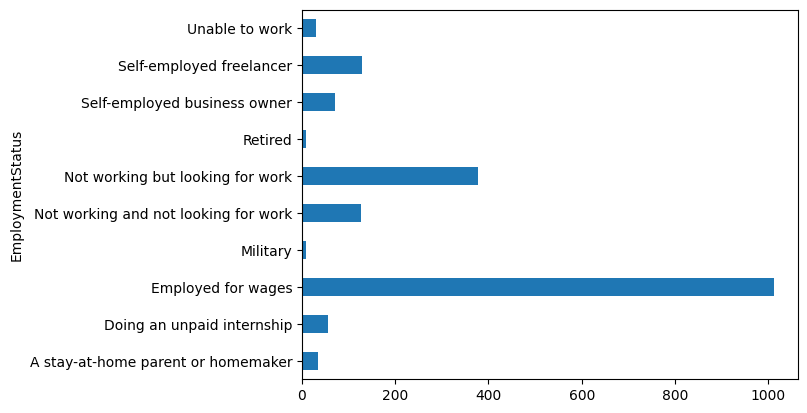

In [17]:
# Create an empty dataframe
all_responses = pd.DataFrame()

# Set up for loop to iterate through values in responses
for df in all_survey_data.items():
    # Print the number of rows being added
    print("Adding {} rows".format(df[1].shape[0]))
    # Append df to all_responses, assign result
    all_responses = all_responses.append(df[1])

# Graph employment statuses in sample
counts = all_responses.groupby("EmploymentStatus").EmploymentStatus.count()
counts.plot.barh()
plt.show()

In [18]:
# # Set dtype to load appropriate column(s) as Boolean data
# survey_data = pd.read_excel("fcc_survey_subset.xlsx",
#                             dtype={'HasDebt':bool})

# # View financial burdens by Boolean group
# print(survey_data.groupby('HasDebt').sum())

In [19]:
# # Load file with Yes as a True value and No as a False value
# survey_subset = pd.read_excel("fcc_survey_yn_data.xlsx",
#                               dtype={"HasDebt": bool,
#                               "AttendedBootCampYesNo": bool},
#                               true_values=['Yes'],
#                               false_values=['No'])

# # View the data
# print(survey_subset.head())

##### Modifying imports: parsing dates


###### Parsing Standard DateTime Format

In [20]:
# Load both the 2016 and 2017 sheets by name
survey_data = pd.read_excel("/content/fcc_survey_dates.xlsx",
                            parse_dates=['Part1StartTime'])

# Print first few values of Part1StartTime
print(survey_data.Part1StartTime.head())

0   2016-03-29 21:23:13
1   2016-03-29 21:24:59
2   2016-03-29 21:25:37
3   2016-03-29 21:21:37
4   2016-03-29 21:26:22
Name: Part1StartTime, dtype: datetime64[ns]


In [21]:
# Create dict of columns to combine into new datetime column
datetime_cols = {"Part2Start": ['Part2StartDate','Part2StartTime']}


# Load file, supplying the dict to parse_dates
survey_data = pd.read_excel("/content/fcc_survey_dates.xlsx",
                            parse_dates=datetime_cols)

# View summary statistics about Part2Start
print(survey_data.Part2Start.describe())

count                    1000
unique                    987
top       2016-03-30 08:30:11
freq                        2
first     2016-03-29 21:27:25
last      2016-03-31 23:05:48
Name: Part2Start, dtype: object


<ipython-input-21-fc28e086d2d6>:10: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(survey_data.Part2Start.describe())


###### Parsing Non Standard Date Time format

In [22]:
# Parse datetimes and assign result back to Part2EndTime
survey_data["Part2EndTime"] = pd.to_datetime(survey_data['Part2EndTime'],
                                   "%m%d%Y %H:%M:%S")
survey_data["Part2EndTime"].head()

0   2016-03-29 21:24:57
1   2016-03-29 21:27:14
2   2016-03-29 21:27:13
3   2016-03-29 21:28:51
4   2016-03-29 21:29:32
Name: Part2EndTime, dtype: datetime64[ns]

## Importing Data from Databases

### Introduction to databases

**Relational Databases**
- Data about entities is organized into tables
- Each row or record is an instance of an entity
- Each column has information about an atribute
- Tables can be linked to each other via unique keys
- Support more data, multiple simultaneous users, and data quality controls
- Data types are specified for each column
- SQL(Structured Query Language) to interact with databases


In [23]:
!pip install --force-reinstall 'sqlalchemy < 2.0.0'
# Run this line and restart runtime to fix AttributeError: ‘optionengine’ object has no attribute ‘execute’

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 613.2/613.2 kB 16.4 MB/s eta 0:00:00
  Attempting uninstall: greenlet
    Found existing installation: greenlet 3.0.1
    Uninstalling greenlet-3.0.1:
      Successfully uninstalled greenlet-3.0.1
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 2.0.23
    Uninstalling SQLAlchemy-2.0.23:
      Successfully uninstalled SQLAlchemy-2.0.23
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython-sql 0.5.0 requires sqlalchemy>=2.0, but you have sqlalchemy 1.4.50 which is incompatible.


#### Connecting to Databases

In [24]:
# load pandas and sqlalchemy's create_engine
import pandas as pd
from sqlalchemy import create_engine
from sqlalchemy import inspect

# Create database engine to manage connections
engine = create_engine('sqlite:///data.db')

# View the tables in the database
insp = inspect(engine)
print(insp.get_table_names())

# Load entire weather table by table name
weather = pd.read_sql_query("SELECT * FROM weather", engine)

['boro_census', 'hpd311calls', 'weather']


In [25]:
# Load libraries
import pandas as pd
from sqlalchemy import create_engine

# Create the database engine
engine = create_engine('sqlite:///data.db')

# Load hpd311calls without any SQL
hpd_calls = pd.read_sql("hpd311calls", engine)

# View the first few rows of data
print(hpd_calls.head())

  unique_key created_date agency  complaint_type incident_zip  \
0   38070822   01/01/2018    HPD  HEAT/HOT WATER        10468   
1   38065299   01/01/2018    HPD        PLUMBING        10003   
2   38066653   01/01/2018    HPD  HEAT/HOT WATER        10452   
3   38070264   01/01/2018    HPD  HEAT/HOT WATER        10032   
4   38072466   01/01/2018    HPD  HEAT/HOT WATER        11213   

       incident_address community_board    borough  
0    2786 JEROME AVENUE        07 BRONX      BRONX  
1  323 EAST   12 STREET    03 MANHATTAN  MANHATTAN  
2  1235 GRAND CONCOURSE        04 BRONX      BRONX  
3  656 WEST  171 STREET    12 MANHATTAN  MANHATTAN  
4       1030 PARK PLACE     08 BROOKLYN   BROOKLYN  


#### Refining imports with SQL queries

##### Selecting Columns

In [26]:
# Create database engine for data.db
engine = create_engine("sqlite:///data.db")

# Write query to get date, tmax, and tmin from weather
query = """
SELECT date,
       tmax,
       tmin
  FROM weather;
"""

# Make a dataframe by passing query and engine to read_sql()
temperatures = pd.read_sql(query, engine)

# View the resulting dataframe
print(temperatures)

           date  tmax  tmin
0    12/01/2017    52    42
1    12/02/2017    48    39
2    12/03/2017    48    42
3    12/04/2017    51    40
4    12/05/2017    61    50
..          ...   ...   ...
116  03/27/2018    47    34
117  03/28/2018    52    38
118  03/29/2018    53    49
119  03/30/2018    62    44
120  03/31/2018    58    39

[121 rows x 3 columns]


##### Selecting Rows

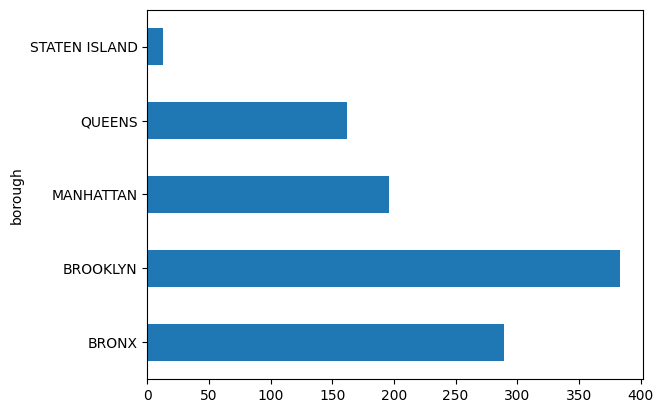

In [27]:
# Create query to get hpd311calls records about safety
query = """
SELECT *
FROM hpd311calls
WHERE complaint_type LIKE '%SAFETY%';
"""

# Query the database and assign result to safety_calls
safety_calls = pd.read_sql(query, engine)

# Graph the number of safety calls by borough
call_counts = safety_calls.groupby('borough').unique_key.count()
call_counts.plot.barh()
plt.show()

##### Multiple Condition Queries

In [28]:
# Create database engine for data.db
engine = create_engine("sqlite:///data.db")

# Create query for records with max temps <= 32 or snow >= 1
query = """
SELECT *
FROM weather
WHERE tmax <= 32 OR
  snow >= 1;
"""

# Query database and assign result to wintry_days
wintry_days = pd.read_sql(query, engine)

# View summary stats about the temperatures
print(wintry_days.describe())

           latitude     longitude     elevation       awnd      prcp  \
count  2.500000e+01  2.500000e+01  2.500000e+01  25.000000  25.00000   
mean   4.077898e+01 -7.396925e+01  4.270000e+01   7.739600   0.17600   
std    7.251946e-15  1.450389e-14  7.251946e-15   2.621778   0.36947   
min    4.077898e+01 -7.396925e+01  4.270000e+01   3.130000   0.00000   
25%    4.077898e+01 -7.396925e+01  4.270000e+01   5.820000   0.00000   
50%    4.077898e+01 -7.396925e+01  4.270000e+01   7.830000   0.00000   
75%    4.077898e+01 -7.396925e+01  4.270000e+01   9.170000   0.09000   
max    4.077898e+01 -7.396925e+01  4.270000e+01  12.970000   1.41000   

            snow       tmax       tmin  
count  25.000000  25.000000  25.000000  
mean    1.332000  27.320000  17.160000  
std     2.685256   7.122266   7.673982  
min     0.000000  13.000000   5.000000  
25%     0.000000  22.000000  11.000000  
50%     0.000000  28.000000  17.000000  
75%     1.200000  31.000000  20.000000  
max     9.800000  40.00

##### Getiing distinct values

In [29]:
# Create query for unique combinations of borough and complaint_type
query = """
SELECT DISTINCT borough,
       complaint_type
  FROM hpd311calls;
"""

# Load results of query to a dataframe
issues_and_boros = pd.read_sql(query, engine)

# Check assumption about issues and boroughs
print(issues_and_boros)

          borough    complaint_type
0           BRONX    HEAT/HOT WATER
1       MANHATTAN          PLUMBING
2       MANHATTAN    HEAT/HOT WATER
3        BROOKLYN    HEAT/HOT WATER
4          QUEENS    HEAT/HOT WATER
..            ...               ...
60      MANHATTAN  OUTSIDE BUILDING
61      MANHATTAN          ELEVATOR
62       BROOKLYN  OUTSIDE BUILDING
63  STATEN ISLAND            SAFETY
64  STATEN ISLAND  OUTSIDE BUILDING

[65 rows x 2 columns]


##### Aggregation with Group By

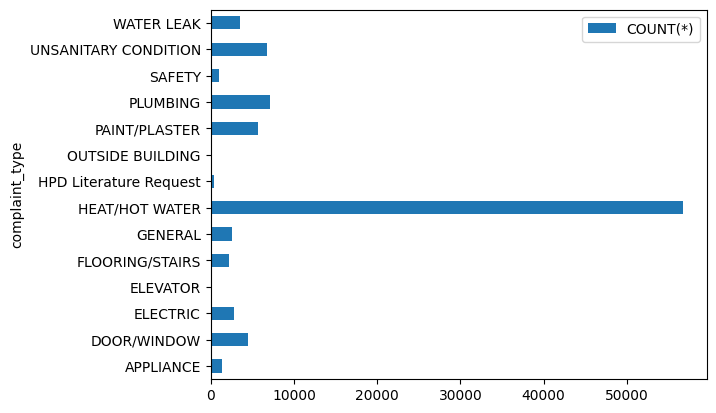

In [30]:
# Create query to get call counts by complaint_type
query = """
SELECT complaint_type,
     COUNT(*)
  FROM hpd311calls
  GROUP BY complaint_type;
"""

# Create dataframe of call counts by issue
calls_by_issue = pd.read_sql(query, engine)

# Graph the number of calls for each housing issue
calls_by_issue.plot.barh(x="complaint_type")
plt.show()

In [31]:
# Create a query to get month and max tmax by month
query = """
SELECT month,
       MAX(tmax),
       MIN(tmin),
       SUM(prcp)
  FROM weather
  GROUP BY month;"""

# Get dataframe of monthly weather stats
weather_by_month = pd.read_sql(query, engine)

# View weather stats by month
print(weather_by_month)

      month  MAX(tmax)  MIN(tmin)  SUM(prcp)
0  December         61          9       2.21
1  February         78         16       5.83
2   January         61          5       2.18
3     March         62         27       5.17


### Loading multiple tables with joins

In [32]:
# Create database engine for data.db
engine = create_engine("sqlite:///data.db")

# Query to join weather to call records by date columns
query = """
SELECT *
  FROM hpd311calls
  JOIN weather
  ON hpd311calls.created_date = weather.date;
"""

# Create dataframe of joined tables
calls_with_weather = pd.read_sql(query, engine)

# View the dataframe to make sure all columns were joined
calls_with_weather.head()

,unique_key,created_date,agency,complaint_type,incident_zip,incident_address,community_board,borough,station,name,...,longitude,elevation,date,month,awnd,prcp,snow,tavg,tmax,tmin
0,38070822,01/01/2018,HPD,HEAT/HOT WATER,10468,2786 JEROME AVENUE,07 BRONX,BRONX,USW00094728,"NY CITY CENTRAL PARK, NY US",...,-73.96925,42.7,01/01/2018,January,7.83,0.0,0.0,,19,7
1,38065299,01/01/2018,HPD,PLUMBING,10003,323 EAST 12 STREET,03 MANHATTAN,MANHATTAN,USW00094728,"NY CITY CENTRAL PARK, NY US",...,-73.96925,42.7,01/01/2018,January,7.83,0.0,0.0,,19,7
2,38066653,01/01/2018,HPD,HEAT/HOT WATER,10452,1235 GRAND CONCOURSE,04 BRONX,BRONX,USW00094728,"NY CITY CENTRAL PARK, NY US",...,-73.96925,42.7,01/01/2018,January,7.83,0.0,0.0,,19,7
3,38070264,01/01/2018,HPD,HEAT/HOT WATER,10032,656 WEST 171 STREET,12 MANHATTAN,MANHATTAN,USW00094728,"NY CITY CENTRAL PARK, NY US",...,-73.96925,42.7,01/01/2018,January,7.83,0.0,0.0,,19,7
4,38072466,01/01/2018,HPD,HEAT/HOT WATER,11213,1030 PARK PLACE,08 BROOKLYN,BROOKLYN,USW00094728,"NY CITY CENTRAL PARK, NY US",...,-73.96925,42.7,01/01/2018,January,7.83,0.0,0.0,,19,7


##### Joining And FIltering

In [33]:
# Query to get water leak calls and daily precipitation
query = """
SELECT hpd311calls.*, weather.prcp
  FROM hpd311calls
  JOIN weather
    ON hpd311calls.created_date = weather.date
  AND hpd311calls.complaint_type = 'WATER LEAK';"""

# Load query results into the leak_calls dataframe
leak_calls = pd.read_sql(query, engine)

# View the dataframe
leak_calls.head()

,unique_key,created_date,agency,complaint_type,incident_zip,incident_address,community_board,borough,prcp
0,38074305,01/01/2018,HPD,WATER LEAK,11212,1026 WILLMOHR STREET,17 BROOKLYN,BROOKLYN,0.0
1,38078748,01/01/2018,HPD,WATER LEAK,10458,2700 MARION AVENUE,07 BRONX,BRONX,0.0
2,38081097,01/01/2018,HPD,WATER LEAK,11221,192 MALCOLM X BOULEVARD,03 BROOKLYN,BROOKLYN,0.0
3,38077874,01/01/2018,HPD,WATER LEAK,11418,129-11 JAMAICA AVENUE,09 QUEENS,QUEENS,0.0
4,38081110,01/01/2018,HPD,WATER LEAK,11420,111-17 133 STREET,10 QUEENS,QUEENS,0.0


In [34]:
# Query to get heat/hot water call counts by created_date
query = """
SELECT hpd311calls.created_date,
       COUNT(*)
  FROM hpd311calls
  WHERE hpd311calls.complaint_type = 'HEAT/HOT WATER'
  GROUP BY hpd311calls.created_date;
"""

# Query database and save results as df
df = pd.read_sql(query, engine)

# View first 5 records
print(df.head())

  created_date  COUNT(*)
0   01/01/2018      4597
1   01/02/2018      4362
2   01/03/2018      3045
3   01/04/2018      3374
4   01/05/2018      4333


In [35]:
# Modify query to join tmax and tmin from weather by date
query = """
SELECT hpd311calls.created_date,
	   COUNT(*),
       weather.tmax,
       weather.tmin
  FROM hpd311calls
       JOIN weather
       ON hpd311calls.created_date = weather.date
 WHERE hpd311calls.complaint_type = 'HEAT/HOT WATER'
 GROUP BY hpd311calls.created_date;
 """

# Query database and save results as df
df = pd.read_sql(query, engine)

# View first 5 records
print(df.head())

  created_date  COUNT(*)  tmax  tmin
0   01/01/2018      4597    19     7
1   01/02/2018      4362    26    13
2   01/03/2018      3045    30    16
3   01/04/2018      3374    29    19
4   01/05/2018      4333    19     9


## Importing JSON Data and Working with APIs

### Introduction to JSON

- Common web data format
- Not tabular
    * Records don't have to all have the same set of atributes
- Data organized into collections of objects
- Objects are collections of atribute-value pairs
- Nested JSON: objects within objects


#### Reading JSON Data

In [37]:
# Load pandas as pd
import pandas as pd

# Load the daily report to a dataframe
pop_in_shelters = pd.read_json('1MB.json')

# View summary stats about pop_in_shelters
print(pop_in_shelters.describe())

           version
count  3168.000000
mean      5.613409
std       2.586392
min       1.010000
25%       3.600000
50%       5.360000
75%       7.870000
max       9.990000


In [40]:
pop_in_shelters.head()

,name,language,id,bio,version
0,Adeel Solangi,Sindhi,V59OF92YF627HFY0,Donec lobortis eleifend condimentum. Cras dict...,6.10
1,Afzal Ghaffar,Sindhi,ENTOCR13RSCLZ6KU,"Aliquam sollicitudin ante ligula, eget malesua...",1.88
2,Aamir Solangi,Sindhi,IAKPO3R4761JDRVG,Vestibulum pharetra libero et velit gravida eu...,7.27
3,Abla Dilmurat,Uyghur,5ZVOEPMJUI4MB4EN,Donec lobortis eleifend condimentum. Morbi ac ...,2.53
4,Adil Eli,Uyghur,6VTI8X6LL0MMPJCC,"Vivamus id faucibus velit, id posuere leo. Mor...",6.49


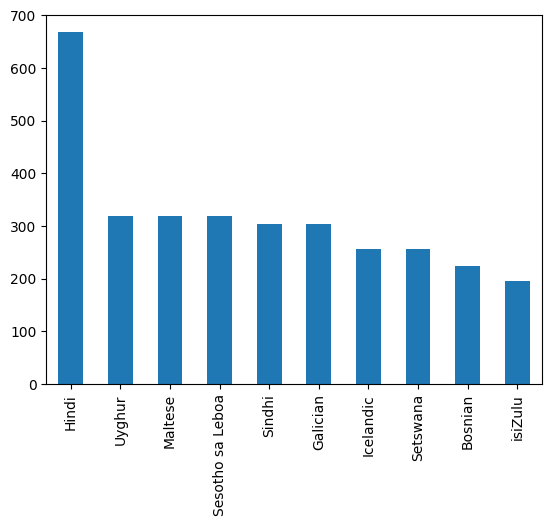

In [44]:
try:
    # Load the JSON without keyword arguments
    df = pd.read_json('/content/records_orient_sample.json')

     # most spoken language
    num_of_language = df['language'].value_counts()
    num_of_language.plot.bar(x=num_of_language.index,
            y="language")
    plt.show()

except ValueError:
    print("pandas could not parse the JSON.")

##### Data Orientation

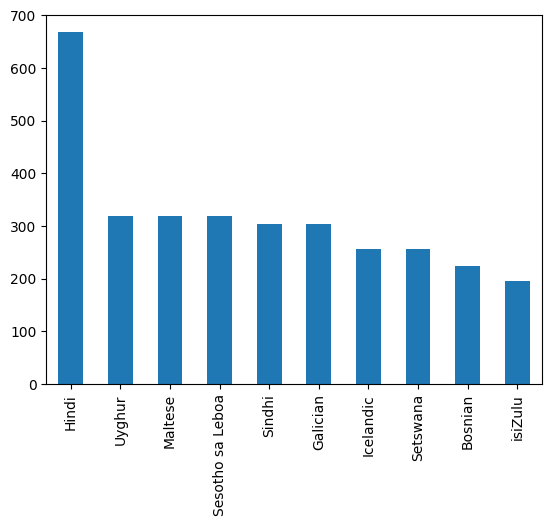

In [46]:
# Try different json files and orient parameter
try:
    # Load the JSON with orient specified
    df = pd.read_json("/content/split_orient_sample.json",
                      orient='split')

     # most spoken language
    num_of_language = df['language'].value_counts()
    num_of_language.plot.bar(x=num_of_language.index,
            y="language")
    plt.show()

except ValueError:
    print("pandas could not parse the JSON.")

### Introduction to APIs

**Application Programming Interfaces**
- Deftnes how a application communicates with other programs
- Way to get data from an application without knowing database details


In [27]:
import requests
import pandas as pd

In [28]:
api_url = 'https://api.yelp.com/v3/businesses/search'

params = {'term': 'cafe', 'location': 'NYC'}

api_key = 'get key from yelp'

headers = {'Authorization':'Bearer {}'.format(api_key)}


<Response [401]>

##### Making a Request andd Parsing a Response in JSON format

In [29]:
api_url = "https://api.yelp.com/v3/businesses/search"

# Get data about NYC cafes from the Yelp API
response = requests.get(api_url,
                headers=headers,
                params=params)
print(params)
# Extract JSON data from the response
data = response.json()

# Load data to a dataframe
cafes = pd.DataFrame(data['businesses'])

# View the data's dtypes
print(cafes.dtypes)

{'term': 'cafe', 'location': 'NYC'}
error    object
dtype: object


In [31]:
# Create dictionary to query API for cafes in NYC
parameters = {'term':'cafe',
          	  'location':'NYC'}

# Query the Yelp API with headers and params set
response = requests.get(api_url,
                headers=headers,
                params=parameters)

# Extract JSON data from response
data = response.json()

# Load "businesses" values to a dataframe and print head
cafes = pd.DataFrame(data['businesses'])
print(cafes.head())

{'error': {'code': 'UNAUTHORIZED_ACCESS_TOKEN',
  'description': 'The access token provided is not currently able to query this endpoint.'}}

### Working with nested JSONs

- pandas.io.json is a submodule for reading and writing JSON
-json_normalize is used to flatten nested JSON

In [47]:
# pandas.io.json is a submodule for reading and writing JSON
# json_normalize is used to flatten nested JSON, it takes a dictionary/list of dictionaries and return a flattened data frame

In [48]:
from pandas.io.json import json_normalize
import requests
import pandas as pd

In [49]:
data = pd.read_json('sample_nested.json')
data

,coffee,brewing
region,"[{'id': 1, 'name': 'John Doe'}, {'id': 2, 'nam...","[{'id': 1, 'name': 'John Doe'}, {'id': 2, 'nam..."
country,"{'id': 2, 'company': 'ACME'}","{'id': 2, 'company': 'ACME'}"


##### Loading Nested JSON Data

In [76]:
data = [
    {
        "state": "Florida",
        "shortname": "FL",
        "info": {"governor": "Rick Scott"},
        "counties": [
            {"name": "Dade", "population": 12345},
            {"name": "Broward", "population": 40000},
            {"name": "Palm Beach", "population": 60000},
        ],
    },
    {
        "state": "Ohio",
        "shortname": "OH",
        "info": {"governor": "John Kasich"},
        "counties": [
            {"name": "Summit", "population": 1234},
            {"name": "Cuyahoga", "population": 1337},
        ],
    },
]
result = pd.json_normalize(
    data, "counties", ["state", "shortname", ["info", "governor"]]
)

result

,name,population,state,shortname,info.governor
0,Dade,12345,Florida,FL,Rick Scott
1,Broward,40000,Florida,FL,Rick Scott
2,Palm Beach,60000,Florida,FL,Rick Scott
3,Summit,1234,Ohio,OH,John Kasich
4,Cuyahoga,1337,Ohio,OH,John Kasich


##### Loading Complex Nested JSON

In [57]:
# Load json_normalize()
from pandas.io.json import json_normalize
import json

# Isolate the JSON data from the API response
with open('sample_nested.json') as f:
    data = json.load(f)

# Flatten JSON data into a dataframe, replace separator
data = json_normalize(data, sep='_')

# View data
data

<ipython-input-57-f1e54a517795>:8: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  data = json_normalize(data, sep='_')


,coffee_region,coffee_country_id,coffee_country_company,brewing_region,brewing_country_id,brewing_country_company
0,"[{'id': 1, 'name': 'John Doe'}, {'id': 2, 'nam...",2,ACME,"[{'id': 1, 'name': 'John Doe'}, {'id': 2, 'nam...",2,ACME


In [110]:
# Load json_normalize()
from pandas.io.json import json_normalize
import json

# Isolate the JSON data from the API response
with open('sample_nested.json') as f:
    data = json.load(f)

df = pd.DataFrame()

# Flatten JSON data into a dataframe, replace separator
for key in data.keys():
    df1 = json_normalize(data[key], 'region',[['country','id'],['country','company']], sep='_')
    df1['category'] = key
    df = df.append(df1)

# View data
df

coffee
brewing


<ipython-input-110-678f0cc69749>:14: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  df1 = json_normalize(data[key], 'region',[['country','id'],['country','company']], sep='_')
<ipython-input-110-678f0cc69749>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df1)
<ipython-input-110-678f0cc69749>:14: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  df1 = json_normalize(data[key], 'region',[['country','id'],['country','company']], sep='_')
<ipython-input-110-678f0cc69749>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df1)


,id,name,country_id,country_company,category
0,1,John Doe,2,ACME,coffee
1,2,Don Joeh,2,ACME,coffee
0,1,John Doe,2,ACME,brewing
1,2,Don Joeh,2,ACME,brewing


In [ ]:
# # Load json_normalize()
# from pandas.io.json import json_normalize

# # Isolate the JSON data from the API response
# data = response.json()

# # Flatten business data into a dataframe, replace separator
# cafes = json_normalize(data["businesses"],
#              sep='_')

# # View data
# print(cafes.head())

In [ ]:
# # Load other business attributes and set meta prefix
# flat_cafes = json_normalize(data["businesses"],
#                             sep="_",
#                     		record_path="categories",
#                     		meta=['name',
#                                   'alias',
#                                   'rating',
#                           		  ['coordinates', 'latitude'],
#                           		  ['coordinates', 'longitude']],
#                     		meta_prefix='biz_')





# # View the data
# print(flat_cafes.head())

#### Combining Multiple Datasets

In [ ]:
# # Merge crosswalk into cafes on their zip code fields
# cafes_with_pumas = cafes.merge(crosswalk, left_on='location_zip_code', right_on='zipcode')



# # Merge pop_data into cafes_with_pumas on puma field
# cafes_with_pop = cafes_with_pumas.merge(pop_data, on='puma')

# # View the data
# print(cafes_with_pop.head())